In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaccel as pa
import pymodels as pm
from diagnostics import calc_ellipse_equation
from injection_sim import Injection

%config Completer.use_jedi = False

# TEST: create_injection_lattice 

In [2]:
injsys = Injection()
injsys.create_injection_lattice()

nlk_idx = injsys._nlk_idx

print("\n Loaded Sirius Model \n",injsys.si)
print("\n Sirius start point \n",injsys.si[0])
print('\n Sirius at nlk idx \n' ,injsys.si[nlk_idx[0]])


 Loaded Sirius Model 
 energy         : 3000000000.0 eV
harmonic_number: 864
cavity_on      : True
radiation_on   : True
vchamber_on    : True
lattice size   : 6489
lattice length : 518.3898999999926 m

 Sirius start point 
 fam_name   : InjSeptF 
pass_method: identity_pass 
hmin       : -0.03 m
hmax       : 0.012 m
vmin       : -0.012 m
vmax       : 0.012 m

 Sirius at nlk idx 
 fam_name   : InjNLKckr 
pass_method: str_mpole_symplectic4_pass 
length     : 0.45 m
nr_steps   : 31 
hmin       : -0.0095 m
hmax       : 0.0095 m
vmin       : -0.012 m
vmax       : 0.012 m


# TEST: create_initial_bunch

Bunch created with  1000  particles 



/home/facs/repos/apsuite/apsuite/sirius_injection/plots.py:44: UserWarning: No contour levels were found within the data range.
  ax[1].contour(y*1e3, y_*1e3, eqy, [0], linewidths = 2)


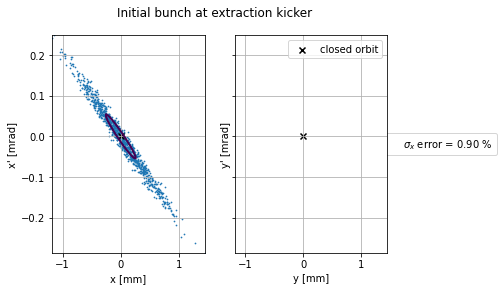

In [3]:
injsys.create_initial_bunch(plot=True, verbose=True)

# Test: eject_from_booster

- setting bo extraction kick to 2.461 mrad 

Particles lost at kicker to septum trajectory: 0


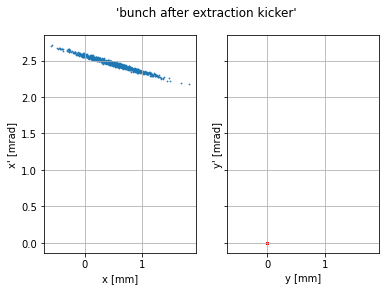

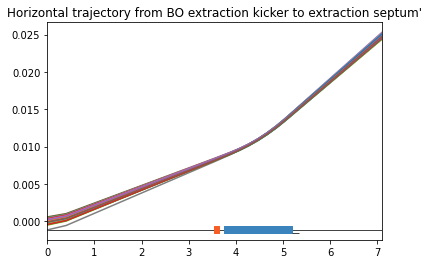

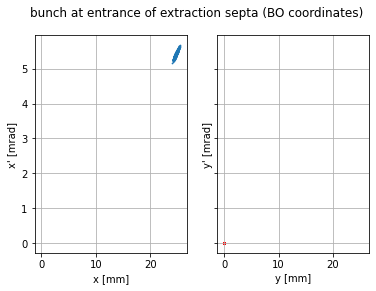

In [4]:
injsys.eject_from_booster(plot=True,verbose=True)

# Test: transport along ts

/home/facs/repos/apsuite/apsuite/sirius_injection/plots.py:43: UserWarning: No contour levels were found within the data range.
  ax[0].contour(x*1e3, x_*1e3, eqx, [0], linewidths = 2 )
/home/facs/repos/apsuite/apsuite/sirius_injection/plots.py:44: UserWarning: No contour levels were found within the data range.
  ax[1].contour(y*1e3, y_*1e3, eqy, [0], linewidths = 2)


Particles losts at TS = 105


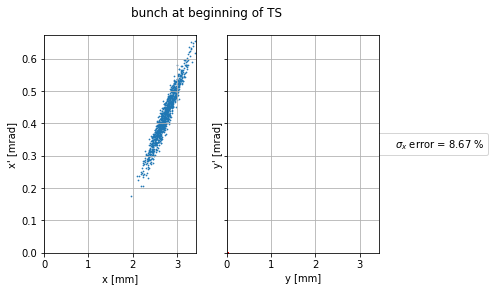

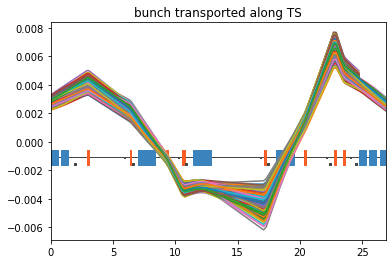

/home/facs/repos/apsuite/apsuite/sirius_injection/plots.py:43: UserWarning: No contour levels were found within the data range.
  ax[0].contour(x*1e3, x_*1e3, eqx, [0], linewidths = 2 )
/home/facs/repos/apsuite/apsuite/sirius_injection/plots.py:44: UserWarning: No contour levels were found within the data range.
  ax[1].contour(y*1e3, y_*1e3, eqy, [0], linewidths = 2)


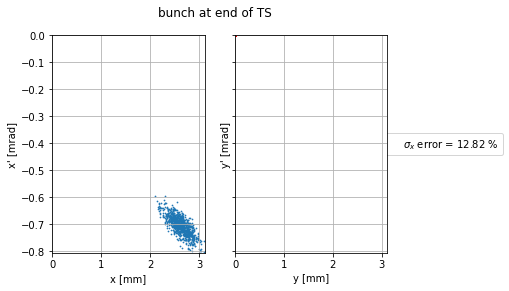

In [5]:
injsys.transport_along_ts()

Checking ideal bunch propagation

In [6]:
from diagnostics import calc_ellipse_equation
twiss = injsys.ts_twiss
eq_params = injsys.bo_eqparams
alpha = twiss.alphax[-1]
beta = twiss.betax[-1]
gamma = (1 + alpha**2)/beta 
emitx = eq_params.emitx
x,x_,eq = calc_ellipse_equation(gamma,alpha,beta,emitx,injsys.bunch[0,:], injsys.bunch[1,:])

In [7]:
np.mean(eq), np.var(eq)

(2.4718402085326477e-06, 3.617961406333348e-13)

Given a conic form $Ax^2 + Bxy + Cy^2 + F =0$ , it will be an ellipse if, and only if $B^2 - 4 A<0$. Lets check this at the end of TS

In [8]:
A = gamma
B = 2*alpha 
B**2 - 4*A

6.4291717944667255

So, for some reason, we can't form a emmitance ellipse with the twiss parameters calculated at end of Transport Line, lets try in the begining:

In [14]:
twiss = injsys.ts_twiss[0]
alpha = twiss.alphax
beta = twiss.betax
gamma = (1+ alpha**2)/beta

A = gamma
B = 2*alpha 
B**2 - 4*A


20.009098097981276

again, the same situation...

## BUG AT TS VACUUM CHAMBER

In [9]:
hmax_array = pa.lattice.get_attribute(injsys.ts[0],attribute_name='hmax')

In [10]:
#The physical aperture diverges at index 0 and index >= 30
hmax_array[:50]

array([1.79769313e+308, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.50000000e-002, 1.50000000e-002,
       1.50000000e-002, 1.50000000e-002, 1.79769313e+308, 1.79769313e+308,
       1.79769313e+308, 1.79769313e+308, 1.79769313e+308, 1.79769313e+308,
       1.79769313e+308, 1.79769313e+308, 1.79769313e+308, 1.79769313e+308,
       1.79769313e+308, 1.79769313e+308, 1.79769313e+308, 1.79769313e+308,
       1.79769313e+308, 1.79769313e+308, 1.79769313e+308, 1.79769313e+308,
       1.79769313e+308, 1.79769313e+308])

# Test Injection no Sirius

In [11]:
#injsys.inject_into_si_and_transports_to_nlk()